<a href="https://colab.research.google.com/github/mvkumar14/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

In [0]:
#imports
import seaborn as sns

#Custom Functions:


In [0]:
def group_by(df,col):
  """
  Inputs:
  df = dataframe
  col = column to groupby

  Outputs:
  dictionary where:
  keys = the different values in the column you are grouping by
      (ex: column contains car colors. The keys would be the colors
      (red, black, silver...))
  values = dataframes that only contain rows with the key value specified
      (ex: dict[red] would contain a dataframe with all the red cars)
  
  Example:
  your_dict = group_by(df,col) 
  """
  x = df.groupby(col)
  my_dict = {}
  for key,i in x:
    my_dict[key]=i
  return my_dict

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

##Data Exploration (With plots)

In [247]:
df.dtypes

bathrooms               float64
bedrooms                  int64
created                  object
description              object
display_address          object
latitude                float64
longitude               float64
price                     int64
street_address           object
interest_level           object
elevator                  int64
cats_allowed              int64
hardwood_floors           int64
dogs_allowed              int64
doorman                   int64
dishwasher                int64
no_fee                    int64
laundry_in_building       int64
fitness_center            int64
pre-war                   int64
laundry_in_unit           int64
roof_deck                 int64
outdoor_space             int64
dining_room               int64
high_speed_internet       int64
balcony                   int64
swimming_pool             int64
new_construction          int64
terrace                   int64
exclusive                 int64
loft                      int64
garden_p

In [248]:
print(df.shape)
df.head(2)

(48818, 34)


,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from datetime import datetime
from dateutil.parser import parse
df.created = df.created.apply(parse)

In [250]:
num_bins = 10
bin_labels = list(range(num_bins))
original_labels = pd.cut(df.created,num_bins)
bin_labels_dict = dict(zip(bin_labels,original_labels))
df['binned_posting']=pd.cut(df.created,num_bins,labels=bin_labels)
df.binned_posting

0        9
1        8
2        1
3        1
4        2
        ..
49347    6
49348    0
49349    1
49350    0
49351    1
Name: binned_posting, Length: 48818, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

{0: Interval('2016-06-21 00:08:52.400000', '2016-06-29 21:41:47', closed='right'), 1: Interval('2016-06-12 02:35:57.800000', '2016-06-21 00:08:52.400000', closed='right'), 2: Interval('2016-04-10 19:45:35.600000', '2016-04-19 17:18:30.200000', closed='right'), 3: Interval('2016-04-10 19:45:35.600000', '2016-04-19 17:18:30.200000', closed='right'), 4: Interval('2016-04-19 17:18:30.200000', '2016-04-28 14:51:24.800000', closed='right'), 5: Interval('2016-04-10 19:45:35.600000', '2016-04-19 17:18:30.200000', closed='right'), 6: Interval('2016-04-19 17:18:30.200000', '2016-04-28 14:51:24.800000', closed='right'), 7: Interval('2016-04-10 19:45:35.600000', '2016-04-19 17:18:30.200000', closed='right'), 8: Interval('2016-04-19 17:18:30.200000', '2016-04-28 14:51:24.800000', closed='right'), 9: Interval('2016-04-01 20:04:33.254000128', '2016-04-10 19:45:35.600000', closed='right')}


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9736d60940>,
      dtype=object)

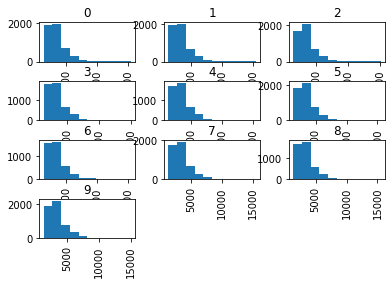

In [251]:
print(bin_labels_dict)
df.price.hist(df['binned_posting'])

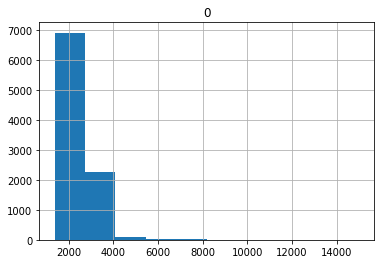

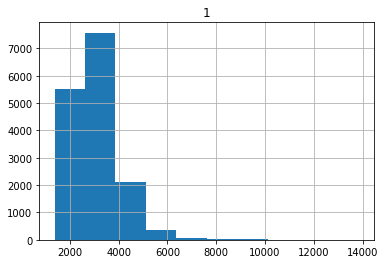

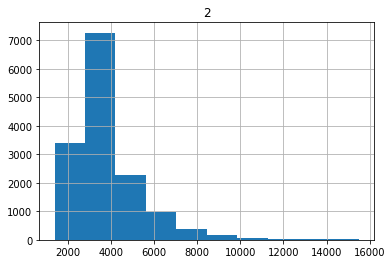

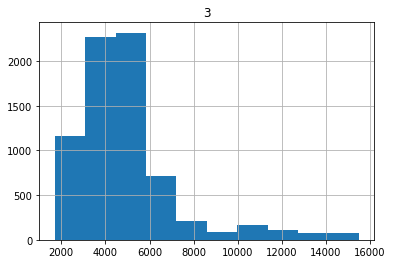

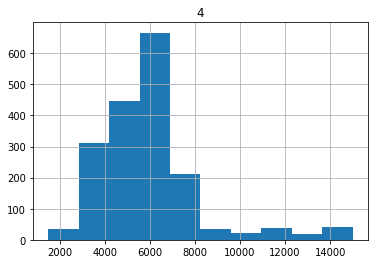

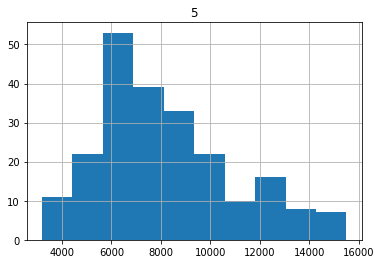

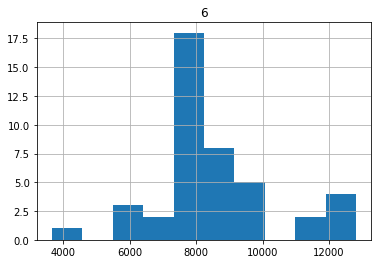

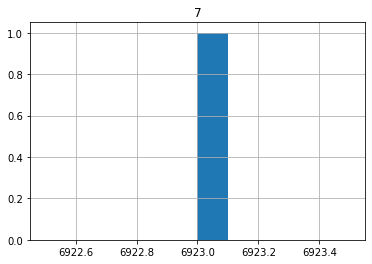

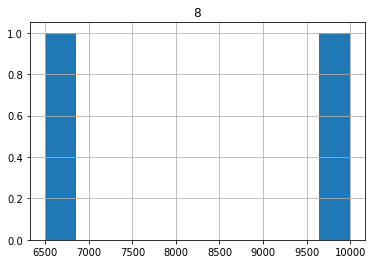

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def hist_by(df,feature):
  bedrooms = group_by(df,feature)
  for key,value in bedrooms.items():
    # print(key,value)
    value.price.hist()
    plt.title(key)
    plt.show()

hist_by(df,'bedrooms')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9736bd18d0>,
      dtype=object)

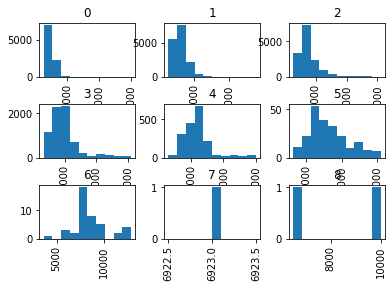

In [253]:
#Everything up there can be done with this:
df.hist('price',by='bedrooms')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9736eb9e80>,
      dtype=object)

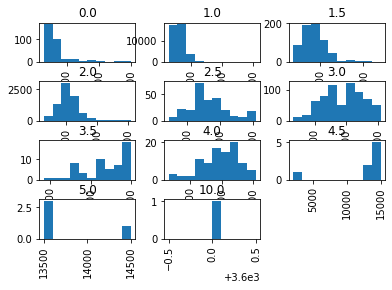

In [254]:
df.hist('price',by='bathrooms')

In [255]:
# A covariance matrix:
df.cov()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
bathrooms,0.221566,0.272855,0.000247,-0.000274,5.701710e+02,0.031238,0.005052,0.022791,0.005745,0.036573,0.039948,0.029394,-0.001389,0.030943,-0.002967,0.037522,0.016310,0.023480,0.033319,0.011829,0.015370,0.012182,0.006978,0.013908,-0.000186,0.001357,0.008810,0.005128,-0.000256
bedrooms,0.272855,1.223408,0.000149,0.001762,1.043878e+03,-0.013715,-0.006178,0.053269,-0.005367,-0.026009,0.082892,0.086898,0.002116,0.006443,0.000609,0.063921,0.017057,0.047708,0.063635,0.019037,0.025776,0.008447,0.000222,0.023019,-0.003350,-0.024008,0.015213,0.002215,0.000572
latitude,0.000247,0.000149,0.001518,0.000370,-2.486717e+00,-0.000203,-0.000578,0.000365,-0.000598,-0.000834,-0.000394,-0.000502,-0.000362,-0.001871,0.000407,-0.000657,-0.000835,-0.001074,0.000203,-0.000340,0.000157,0.000241,-0.000485,0.000053,-0.000476,-0.000123,-0.000004,-0.000433,-0.000730
longitude,-0.000274,0.001762,0.000370,0.000834,-1.277939e+01,-0.002739,-0.000845,-0.001566,-0.001011,-0.003938,-0.002409,-0.001226,-0.000288,-0.003264,0.000002,-0.001431,-0.001583,-0.000984,-0.000218,-0.001024,-0.000244,-0.000495,-0.000692,-0.000297,0.000275,-0.000351,-0.000168,-0.000299,-0.000475
price,570.171012,1043.877735,-2.486717,-12.779392,3.106127e+06,182.346234,45.309384,89.372067,52.943717,240.648222,194.444760,112.346543,-7.649612,178.684625,-19.952008,181.980270,73.516547,86.511236,130.036952,44.887066,58.451687,54.143519,27.928928,54.001516,-4.752462,2.531216,35.516847,20.798993,3.245230
elevator,0.031238,-0.013715,-0.000203,-0.002739,1.823462e+02,0.249389,0.008324,0.067565,0.008654,0.151711,0.086085,0.054860,0.015754,0.095400,-0.018836,0.025510,0.056263,0.035239,0.030427,0.039122,0.020008,0.020947,0.020405,0.014186,0.002633,0.005546,0.008160,0.012629,0.009171
cats_allowed,0.005052,-0.006178,-0.000578,-0.000845,4.530938e+01,0.008324,0.249533,-0.044320,0.232807,0.021852,-0.011781,-0.005788,0.011799,0.028091,0.009228,-0.001677,0.004678,0.011509,-0.003398,0.010960,0.002379,0.001108,0.004733,0.000645,0.003194,-0.003834,0.000650,0.003224,0.008344
hardwood_floors,0.022791,0.053269,0.000365,-0.001566,8.937207e+01,0.067565,-0.044320,0.249533,-0.046112,0.050654,0.156296,0.082583,-0.016163,0.037084,0.002611,0.068606,0.047245,0.032588,0.048141,0.033534,0.021205,0.019462,0.020793,0.018979,-0.019769,0.011775,0.015706,0.010148,-0.009621
dogs_allowed,0.005745,-0.005367,-0.000598,-0.001011,5.294372e+01,0.008654,0.232807,-0.046112,0.247262,0.023462,-0.010737,-0.002732,0.010343,0.028984,0.009980,0.000477,0.005755,0.011653,-0.002439,0.012546,0.002901,0.001099,0.006140,0.000545,0.003313,-0.004123,0.000892,0.003894,0.008431
doorman,0.036573,-0.026009,-0.000834,-0.003938,2.406482e+02,0.151711,0.021852,0.050654,0.023462,0.244356,0.076170,0.061245,0.008534,0.132504,-0.010495,0.031318,0.065235,0.035106,0.029401,0.043518,0.018946,0.029786,0.024120,0.013171,-0.007520,0.001008,0.007299,0.013528,0.010012


## Assignment:

Implimenting single variable regression

In [256]:
#1
from sklearn.linear_model import LinearRegression

#2
model = LinearRegression()

#3 X and y
X = df[['bedrooms']]
y = df.price

#4 train model
model.fit(X,y)

#5 use model

print(model.predict([[3]]))
print(model.coef_)
print(model.intercept_)


[4827.73665176]
[853.25416753]
2267.9741491780505


In [257]:
def predict_bed(num_beds):
  prediction = model.predict([[num_beds]])
  prediction = prediction[0]
  coeffs = model.coef_
  print(f'This model predicts the price of the {num_beds} bedroom apartment to be: ${prediction:,.0f}'
        f' compare to average = ${df[df.bedrooms==num_beds].price.mean()} ')
  print(f"In this model increasing the number of bedrooms increases cost by ${coeffs[0]:,.0f}")


for i in list(range(6)):
  predict_bed(i)



This model predicts the price of the 0 bedroom apartment to be: $2,268 compare to average = $2486.5520017172908 
In this model increasing the number of bedrooms increases cost by $853
This model predicts the price of the 1 bedroom apartment to be: $3,121 compare to average = $3062.9187272378763 
In this model increasing the number of bedrooms increases cost by $853
This model predicts the price of the 2 bedroom apartment to be: $3,974 compare to average = $3779.5006863417984 
In this model increasing the number of bedrooms increases cost by $853
This model predicts the price of the 3 bedroom apartment to be: $4,828 compare to average = $4930.056622148025 
In this model increasing the number of bedrooms increases cost by $853
This model predicts the price of the 4 bedroom apartment to be: $5,681 compare to average = $5989.299726027397 
In this model increasing the number of bedrooms increases cost by $853
This model predicts the price of the 5 bedroom apartment to be: $6,534 compare to 

In [258]:
#Lets double check some of these values:
#bedroom prediction:
for i in list(range(6)):
  print(f'The average for {i} bedrooms is ${df[df.bedrooms==i].price.mean()}')

#I ended up adding this to the code above.

The average for 0 bedrooms is $2486.5520017172908
The average for 1 bedrooms is $3062.9187272378763
The average for 2 bedrooms is $3779.5006863417984
The average for 3 bedrooms is $4930.056622148025
The average for 4 bedrooms is $5989.299726027397
The average for 5 bedrooms is $8213.692307692309


Implimenting linear regression with 2 variables

In [259]:
#1
from sklearn.linear_model import LinearRegression

#2
model = LinearRegression()

#3 X and y
X = df[['bedrooms','bathrooms']]
y = df.price

#4 train model
model.fit(X,y)

#5 use model

print(model.predict([[3,0]]))
print(model.coef_)
print(model.intercept_)


[1620.1415726]
[ 385.08418275 2099.14867224]
464.8890243441597


In [260]:
def predict_bedbath(bedrooms,bathrooms):
  prediction = model.predict([[bedrooms,bathrooms]])
  prediction = prediction[0]
  coeffs = model.coef_
  print(f'This model predicts the price of the '
        f'{bedrooms} bed {bathrooms} bath apartment to' 
        f' be: ${prediction:,.0f}')
  print(f"In this model increasing the number of bedrooms increases cost by ${coeffs[0]:,.0f}\n"
        f'Increasing the number of bathrooms increases the cost by ${coeffs[1]:,.0f}')

predict_bedbath(2,1)

This model predicts the price of the 2 bed 1 bath apartment to be: $3,334
In this model increasing the number of bedrooms increases cost by $385
Increasing the number of bathrooms increases the cost by $2,099


Trying to find out why the "influence" of bathrooms is so much greater than the influence of number of bedrooms

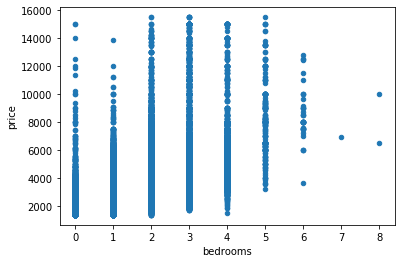

In [261]:
#I wonder why the bathrooms have such a bigger impact compared to bedrooms on the model
df.plot.scatter('bedrooms','price')

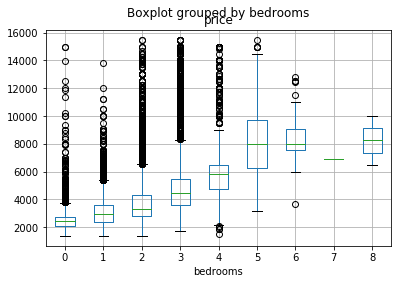

In [262]:
#Lets see what the spread of data in "bedrooms" is 
df.boxplot('price',by='bedrooms')
#Up to 5 it seems polynomial 

In [263]:
#What is the trendline through "bedrooms"
import plotly.express as px
px.scatter(df,'bedrooms','price',trendline='ols')

In [265]:
#I graphed once and there is one row with 10 bathrooms?
df[df.bathrooms==10]
#seems like it is bathrooms for the building? or maybe a type (probably worth dropping for the graph above)

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,binned_posting
1990,10.0,2,2016-04-09 04:34:31,***The building?s well-attended lobby welcomes...,W 52 St.,40.7633,-73.9849,3600,260 W 52 St.,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
drop_row = df[df.bathrooms==10].index.to_list()
df = df.drop(drop_row)

In [276]:
#cool we dropped it properly
df[df.bathrooms==10]

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,binned_posting


In [277]:
#graph same thing for bathrooms
px.scatter(df,'bathrooms','price',trendline='ols')

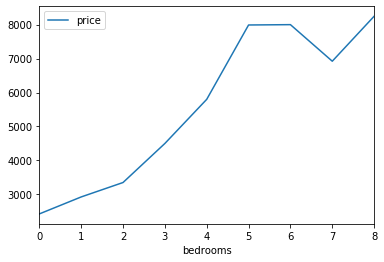

In [278]:
#Now a different visual to show the means of bedroom price
df.groupby(['bedrooms']).price.median().to_frame().plot()

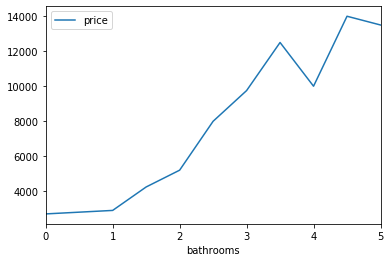

In [280]:
#And Bathrooms
df.groupby(['bathrooms']).price.median().to_frame().plot()

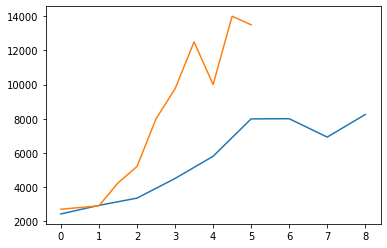

In [289]:
#now both on the same graph:
bed_means = df.groupby(['bedrooms']).price.median().to_frame().reset_index()
bath_means = df.groupby(['bathrooms']).price.median().to_frame().reset_index()

plt.plot(bed_means.bedrooms,bed_means.price)
plt.plot(bath_means.bathrooms,bath_means.price)

An increase in the number of bathrooms more sharply increases the price. Remember the graph above shows averages, Graphing both elements on a 3d plot might give us a better sense of the relationship of all of them.